In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')

C:\Users\BB\AppData\Local\Temp\ipykernel_7800\2621172700.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')


In [3]:
df_resultados.head()

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


In [4]:
df_resultados.columns

Index(['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre',
       'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre',
       'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre',
       'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre',
       'votos_tipo', 'votos_cantidad'],
      dtype='object')

In [5]:
df_resultadosCaba = df_resultados[(df_resultados['distrito_id'] == 1) &
                                (df_resultados['cargo_nombre'] == "PRESIDENTE Y VICE")]

# Seleccionar solo las columnas requeridas
df_resultadosCaba = df_resultadosCaba[['seccion_id', 'circuito_id',
                                    'mesa_id', 'agrupacion_nombre',
                                    'votos_cantidad']]

# Restablecer el índice para que comience en 0
df_resultadosCaba.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(df_resultadosCaba.head())


   seccion_id circuito_id  mesa_id    agrupacion_nombre  votos_cantidad
0           1       00018      474                  NaN               0
1           1       00018      474                  NaN               0
2           1       00018      474                  NaN               0
3           1       00018      474                  NaN               0
4           1       00018      475  UNION POR LA PATRIA              95


In [6]:
for column in df_resultadosCaba.columns:
    unique_values = df_resultadosCaba[column].unique()
    print(f"Valores únicos en '{column}':\n{unique_values}\n")

Valores únicos en 'seccion_id':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Valores únicos en 'circuito_id':
['00018' '00019' '00001' '00002' '00003' '00004' '00005' '00006' '00007'
 '00008' '00009' '00010' '00020' '00021' '00022' '00023' '00024' '00011'
 '00012' '00013' '00014' '00015' '00016' '00017' '00031' '00032' '00033'
 '00034' '00035' '00025' '00026' '00027' '00028' '00029' '00030' '00036'
 '00037' '00038' '00039' '00040' '00041' '00042' '00043' '00044' '00045'
 '00046' '00047' '00048' '00049' '00050' '00051' '00052' '00053' '00054'
 '00055' '00056' '00057' '00058' '00059' '00060' '00061' '00062' '00063'
 '00064' '00065' '00066' '00067' '00068' '00069' '00070' '00071' '00072'
 '00073' '00074' '00075' '00076' '00077' '00078' '00079' '00080' '00081'
 '00082' '00083' '00084' '00085' '00086' '00087' '00088' '00089' '00090'
 '00091' '00092' '00093' '00094' '00095' '00096' '00097' '00098' '00099'
 '00100' '00101' '00102' '00103' '00104' '00105' '00106' '00107' '00108'
 '00109' '0

In [7]:
total_votos = df_resultadosCaba['votos_cantidad'].sum()

# Mostrar el total de votos
print("Total de votos:", total_votos)

Total de votos: 1911431


In [8]:
df_caba.head(20)

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06
5,MULTIPOLYGON (((-58.3873023480216 -34.59463330...,6,6,1,RETIRO,17159.0,7661.0,9498.0,2878.669431,5.062783e+05
6,MULTIPOLYGON (((-58.3812346618738 -34.59903448...,7,7,1,RETIRO,9011.0,4132.0,4879.0,2103.381059,2.740453e+05
7,MULTIPOLYGON (((-58.3737615585808 -34.59379331...,8,8,1,RETIRO,9483.0,4904.0,4579.0,3002.231934,4.862430e+05
8,MULTIPOLYGON (((-58.3812582235222 -34.59903558...,9,9,1,SAN NICOLAS,12534.0,7564.0,4970.0,4418.868737,1.184442e+06
9,MULTIPOLYGON (((-58.3868615209945 -34.59929129...,10,10,1,SAN NICOLAS,14356.0,7632.0,6724.0,3178.482770,5.529536e+05


In [9]:
df_caba.columns

Index(['WKT', 'ID', 'CIRCUITO_N', 'COMUNA', 'BARRIO', 'TOTAL', 'MASCULINO',
       'FEMENINO', 'PERIMETRO', 'AREA'],
      dtype='object')

In [10]:
for column in df_caba.columns:
    unique_values = df_caba[column].unique()
    print(f"Valores únicos en '{column}':\n{unique_values}\n")

Valores únicos en 'WKT':
['MULTIPOLYGON (((-58.3661871461469 -34.6204312876783,-58.3660639106602 -34.621515418103,-58.3658425950003 -34.6237048832166,-58.3658342563784 -34.623835253489,-58.3657919798787 -34.6239884106249,-58.3654779550486 -34.6239704890445,-58.3640983812104 -34.6247099910476,-58.3635108880291 -34.6249876716871,-58.3634535130463 -34.6251237728734,-58.3664821002131 -34.6251912978642,-58.3679784789629 -34.62519842047,-58.3679550369998 -34.6271427044301,-58.3680980198034 -34.6271931268357,-58.368251981578 -34.6273183042386,-58.3686156102674 -34.6276353327267,-58.3694356610091 -34.6283186865831,-58.3706574008251 -34.6294995959563,-58.3709626379646 -34.6266508132812,-58.3713063658055 -34.6266628839813,-58.3725521459197 -34.6267466708693,-58.3745640705045 -34.6268014291647,-58.3755730893349 -34.6273052700513,-58.3762237604151 -34.6262869670616,-58.3767496130235 -34.6251220540446,-58.3770806317425 -34.6234886898763,-58.3772237938455 -34.6220465198698,-58.3772315397202 -34.6208

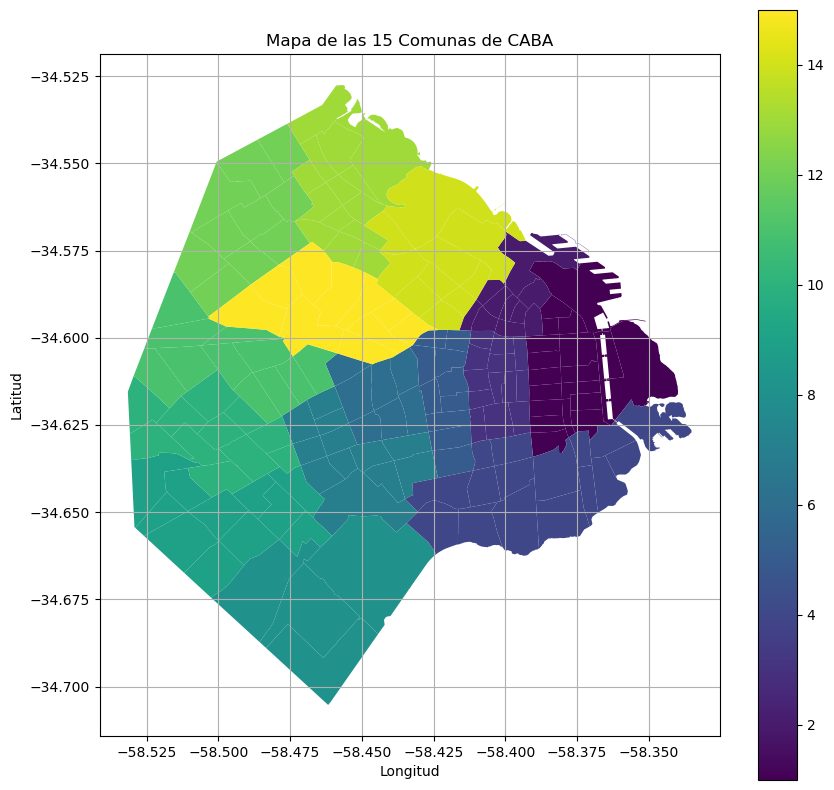

In [11]:

# Convertir la columna 'WKT' en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))

# Establecer el sistema de referencia de coordenadas (CRS)
# Suponiendo que tus datos están en coordenadas geográficas WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Dibujar el mapa
fig, ax = plt.subplots(figsize=(10, 10))  # Puedes ajustar el tamaño según tus necesidades
gdf.plot(column='COMUNA', ax=ax, cmap='viridis', legend=True)

# Configuración adicional para el mapa
plt.title('Mapa de las 15 Comunas de CABA')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

# Mostrar el mapa
plt.show()

<Figure size 1000x1000 with 0 Axes>

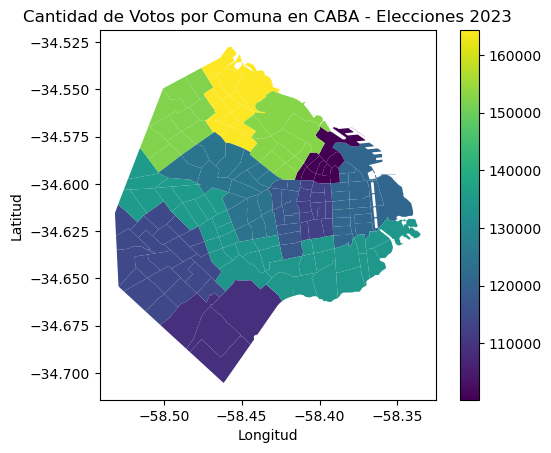

In [12]:
df_resultadosCaba['seccion_id'] = df_resultadosCaba['seccion_id'].astype(df_caba['COMUNA'].dtype)

# Agrupar los datos por 'seccion_id' y sumar los votos
df_votos_por_comuna = df_resultadosCaba.groupby('seccion_id')['votos_cantidad'].sum().reset_index()

# Realizar el merge
gdf_merged = gdf.merge(df_votos_por_comuna, left_on='COMUNA', right_on='seccion_id', how='left')

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
gdf_merged.plot(column='votos_cantidad', legend=True, cmap='viridis')
plt.title('Cantidad de Votos por Comuna en CABA - Elecciones 2023')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [13]:
gdf_merged.head()

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry,seccion_id,votos_cantidad
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05,"MULTIPOLYGON (((-58.36619 -34.62043, -58.36606...",1,121250
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05,"MULTIPOLYGON (((-58.37736 -34.61745, -58.37743...",1,121250
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06,"MULTIPOLYGON (((-58.35729 -34.59511, -58.35723...",1,121250
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05,"MULTIPOLYGON (((-58.36712 -34.61214, -58.36762...",1,121250
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06,"MULTIPOLYGON (((-58.38356 -34.57824, -58.38328...",1,121250


In [14]:
df_votos_por_comuna["votos_cantidad"].sum()

1911431

<Figure size 1000x1000 with 0 Axes>

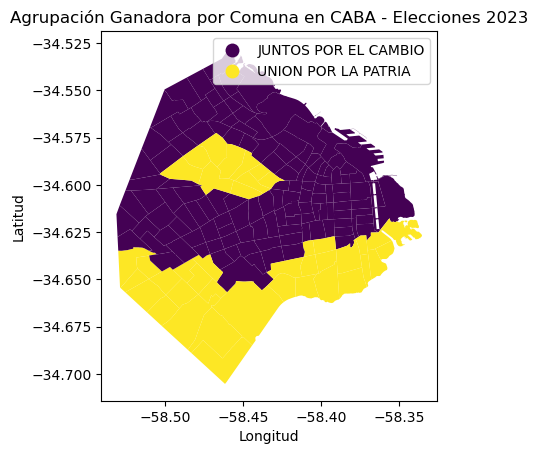

In [15]:
df_votos_comuna_agrupacion = df_resultadosCaba.groupby(['seccion_id', 'agrupacion_nombre'])['votos_cantidad'].sum().reset_index()

# Encontrar la agrupación ganadora en cada comuna
df_votos_maximos = df_votos_comuna_agrupacion.loc[df_votos_comuna_agrupacion.groupby('seccion_id')['votos_cantidad'].idxmax()]

# Realizar el merge con el DataFrame geográfico
gdf_merged = gdf.merge(df_votos_maximos, left_on='COMUNA', right_on='seccion_id', how='left')

# Visualización
plt.figure(figsize=(10, 10))
gdf_merged.plot(column='agrupacion_nombre', legend=True, cmap='viridis')
plt.title('Agrupación Ganadora por Comuna en CABA - Elecciones 2023')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

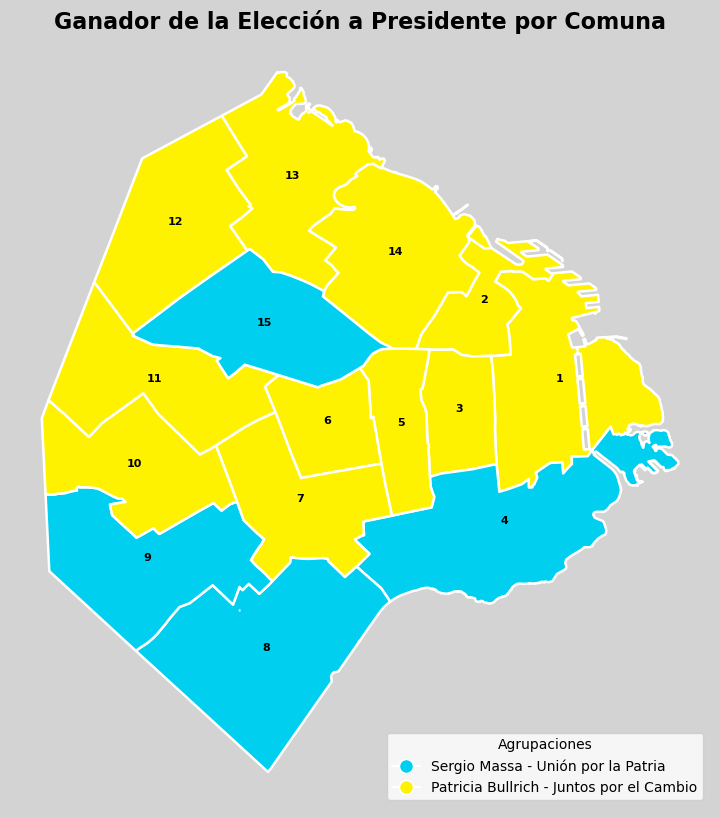

In [31]:
# Título del mapa
titulo = "Ganador de la Elección a Presidente por Comuna"

# Disolver los límites de los circuitos electorales para consolidar las comunas
gdf_dissolved = gdf.dissolve(by='COMUNA')

# Realizar el merge con el DataFrame geográfico disuelto
gdf_merged = gdf_dissolved.merge(df_votos_maximos, left_on='COMUNA', right_on='seccion_id', how='left')

# Crear un mapa de colores personalizado para las agrupaciones
colores = {'JUNTOS POR EL CAMBIO': '#FFF200', 'UNION POR LA PATRIA': '#00CFEF'}
gdf_merged['color'] = gdf_merged['agrupacion_nombre'].map(colores)

# Visualización con fondo gris claro y líneas blancas más anchas
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='lightgrey')

# Plotear usando los colores personalizados y añadir bordes más anchos y blancos
gdf_merged.plot(ax=ax, color=gdf_merged['color'], edgecolor='white', linewidth=1.8)

# Etiquetar cada comuna con su número
for idx, row in gdf_merged.iterrows():
    plt.annotate(text=row['seccion_id'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, weight='bold', color='black')

# Agregar título al mapa
plt.title(titulo, fontsize=16, weight='bold')

# Crear leyenda
leyenda = {
    'Sergio Massa - Unión por la Patria': '#00CFEF',
    'Patricia Bullrich - Juntos por el Cambio': '#FFF200'
}

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
           for label, color in leyenda.items()]

plt.legend(handles=handles, title='Agrupaciones', loc='lower right')

# Quitar los ejes y el recuadro
plt.axis('off')

# Mostrar el mapa
plt.show()

